In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from datetime import timedelta
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from statsmodels.graphics.gofplots import ProbPlot
plt.style.use('seaborn')

In [2]:
data_2019 = pd.read_csv("DATA/Clean/2019VolumeByWeek.csv", index_col=0)
data_2018 = pd.read_csv("DATA/Clean/2018VolumeByWeek.csv", index_col=0)
media = pd.read_csv("DATA/1. KH_Media_Spend_Tactic_Cleaned.csv")
data_2019.head()

,week_start,volume_sales,volume_sales_merch,volume_sales_price_reduce,volume_sales_feature,volume_sales_display,chicken_meal_deal,sec_deli,sec_bakery,sec_center,...,Print - FN Magazine,NE Heavy Up - Linear TV,NE Heavy Up - OOH,BILLBOARD,DIGITAL,INFLUENCERS/DIGITAL,PRINT,SPONSORSHIP,TV,VOD
53,2019-01-07,1.548217e+06,7.402811e+05,145678.038701,42931.319385,649686.102673,0.086570,0.053274,0.041065,0.122087,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.00
54,2019-01-14,1.623131e+06,8.097526e+05,327474.522514,48009.229937,690111.353199,0.088300,0.052980,0.030905,0.121413,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.00
55,2019-01-21,1.536969e+06,8.415892e+05,475047.999262,153470.616830,667412.827482,0.088009,0.052805,0.035204,0.119912,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.00
56,2019-01-28,1.988465e+06,1.256071e+06,957340.258080,374739.879287,925321.610000,0.089716,0.053611,0.041575,0.120350,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.00
57,2019-02-04,1.634517e+06,8.178591e+05,396446.862630,3665.218335,666161.942857,0.088203,0.056229,0.071665,0.125689,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,484375.9724,53499.98


In [3]:
melt_data_2019 = pd.melt(data_2019,id_vars=['week_start', 'volume_sales', 'volume_sales_merch',
                             'volume_sales_price_reduce', 'volume_sales_feature',
                             'volume_sales_display', 'chicken_meal_deal', 'sec_deli', 'sec_bakery',
                             'sec_center', 'retail_cover', 'year', 'month', 'week', 'quarter','holiday', 'holiday_binary'],
                             var_name = "sub_tactics",value_name = "media_spending")


In [4]:
media  = media.drop_duplicates()
media = media.append({"sub_tactics":"VOD","Tactic":"VOD"}, ignore_index=True)


In [5]:
media.groupby(['Tactic','Media']).agg({'Spending':'mean'})

Spending
Tactic    Media                             
BASEBALL  Baseball              24035.711538
          Yankees \KH Grill       382.500000
BILLBOARD NE Heavy Up - OOH     17307.692308
          NE Q4 Heavy Up \ OOH      0.000000
          OOH - Billups          9614.903846
...                                      ...
VOD       NBC VOD                2124.999231
          Online Video          17692.307692
          VOD - CBS              6626.528846
          VOD - HULU             6001.538856
          VOD - NBC              6001.538462

[129 rows x 1 columns]

In [6]:
## read in data
data_2019 = pd.read_csv("DATA/Clean/2019VolumeByWeek.csv", index_col=0)
data_2018 = pd.read_csv("DATA/Clean/2018VolumeByWeek.csv", index_col=0)
media = pd.read_csv("DATA/1. KH_Media_Spend_Tactic_Cleaned.csv")[["Media","Tactic"]].rename(columns = {"Media":"sub_tactics"})

## manipulate data_2019
data_2019["week_start"] = pd.to_datetime(data_2019["week_start"])
data_2019['year'] = "2019"

data_2018["week_start"] = pd.to_datetime(data_2018["week_start"])
data_2018['year'] = "2018"

melt_data_2019 = pd.melt(data_2019,id_vars=['week_start', 'volume_sales', 'volume_sales_merch',
                             'volume_sales_price_reduce', 'volume_sales_feature',
                             'volume_sales_display', 'chicken_meal_deal', 'sec_deli', 'sec_bakery',
                             'sec_center', 'retail_cover', 'year', 'month', 'week', 'quarter','holiday', 'holiday_binary'],
                             var_name = "sub_tactics",value_name = "media_spending")

melt_data_2018 = pd.melt(data_2018,id_vars=['week_start', 'volume_sales', 'volume_sales_merch',
                             'volume_sales_price_reduce', 'volume_sales_feature',
                             'volume_sales_display', 'chicken_meal_deal', 'sec_deli', 'sec_bakery',
                             'sec_center', 'retail_cover', 'year', 'month', 'week', 'quarter','holiday', 'holiday_binary'],
                             var_name = "sub_tactics",value_name = "media_spending")

## manipulate media data
media  = media.drop_duplicates()
media = media.append({"sub_tactics":"VOD","Tactic":"VOD"}, ignore_index=True)
melt_data_2018.head()

,week_start,volume_sales,volume_sales_merch,volume_sales_price_reduce,volume_sales_feature,volume_sales_display,chicken_meal_deal,sec_deli,sec_bakery,sec_center,retail_cover,year,month,week,quarter,holiday,holiday_binary,sub_tactics,media_spending
0,2018-01-01,1715897.724,1.141203e+06,7.037752e+05,11874.46896,725089.7700,0.089623,0.057783,0.033019,0.135613,0.495283,2018,1,1,1,Christmas/NY,1,ABC - SCS Sponsorship,0.0
1,2018-01-08,1435106.907,9.135088e+05,3.892043e+05,38589.27999,615666.6837,0.090482,0.057579,0.022327,0.128085,0.494712,2018,1,2,1,None,0,ABC - SCS Sponsorship,0.0
2,2018-01-15,1392563.409,8.978826e+05,4.334663e+05,34808.71644,595837.1872,0.091873,0.057715,0.020024,0.129564,0.497055,2018,1,3,1,None,0,ABC - SCS Sponsorship,0.0
3,2018-01-22,1393401.237,9.541495e+05,6.197307e+05,47374.39127,606422.4579,0.089202,0.057512,0.023474,0.127934,0.498826,2018,1,4,1,None,0,ABC - SCS Sponsorship,0.0
4,2018-01-29,1938644.818,1.418473e+06,1.191214e+06,480359.05080,971064.1176,0.090376,0.057512,0.035211,0.127934,0.496479,2018,1,5,1,None,0,ABC - SCS Sponsorship,0.0


In [7]:
melt_data_2018 = melt_data_2018.merge(media, on = "sub_tactics",how = "left")
melt_data_2019 = melt_data_2019.merge(media, on = "sub_tactics",how = "left")
melt_data_2018.head()

,week_start,volume_sales,volume_sales_merch,volume_sales_price_reduce,volume_sales_feature,volume_sales_display,chicken_meal_deal,sec_deli,sec_bakery,sec_center,retail_cover,year,month,week,quarter,holiday,holiday_binary,sub_tactics,media_spending,Tactic
0,2018-01-01,1715897.724,1.141203e+06,7.037752e+05,11874.46896,725089.7700,0.089623,0.057783,0.033019,0.135613,0.495283,2018,1,1,1,Christmas/NY,1,ABC - SCS Sponsorship,0.0,SPONSORSHIP
1,2018-01-08,1435106.907,9.135088e+05,3.892043e+05,38589.27999,615666.6837,0.090482,0.057579,0.022327,0.128085,0.494712,2018,1,2,1,None,0,ABC - SCS Sponsorship,0.0,SPONSORSHIP
2,2018-01-15,1392563.409,8.978826e+05,4.334663e+05,34808.71644,595837.1872,0.091873,0.057715,0.020024,0.129564,0.497055,2018,1,3,1,None,0,ABC - SCS Sponsorship,0.0,SPONSORSHIP
3,2018-01-22,1393401.237,9.541495e+05,6.197307e+05,47374.39127,606422.4579,0.089202,0.057512,0.023474,0.127934,0.498826,2018,1,4,1,None,0,ABC - SCS Sponsorship,0.0,SPONSORSHIP
4,2018-01-29,1938644.818,1.418473e+06,1.191214e+06,480359.05080,971064.1176,0.090376,0.057512,0.035211,0.127934,0.496479,2018,1,5,1,None,0,ABC - SCS Sponsorship,0.0,SPONSORSHIP


In [8]:
# aggregrate media spending based on joint data
melt_agg_data = melt_data_2019.groupby(["week_start","Tactic"]).agg({"volume_sales":"mean","volume_sales_merch":"mean",
                                                "volume_sales_price_reduce":"mean","volume_sales_feature":"mean",
                                                "volume_sales_display":"mean","chicken_meal_deal":"mean","sec_deli":"mean",
                                                "sec_center":"mean","retail_cover":"mean","holiday_binary":"mean",
                                                "media_spending":"sum"}).reset_index()

melt_agg_data_2018 = melt_data_2018.groupby(["week_start","Tactic"]).agg({"volume_sales":"mean","volume_sales_merch":"mean",
                                                "volume_sales_price_reduce":"mean","volume_sales_feature":"mean",
                                                "volume_sales_display":"mean","chicken_meal_deal":"mean","sec_deli":"mean",
                                                "sec_center":"mean","retail_cover":"mean","holiday_binary":"mean",
                                                "media_spending":"sum"}).reset_index()

In [9]:
melt_agg_data.head()

,week_start,Tactic,volume_sales,volume_sales_merch,volume_sales_price_reduce,volume_sales_feature,volume_sales_display,chicken_meal_deal,sec_deli,sec_center,retail_cover,holiday_binary,media_spending
0,2019-01-07,BILLBOARD,1.548217e+06,740281.06532,145678.038701,42931.319385,649686.102673,0.08657,0.053274,0.122087,0.600444,0.0,0.0
1,2019-01-07,DIGITAL,1.548217e+06,740281.06532,145678.038701,42931.319385,649686.102673,0.08657,0.053274,0.122087,0.600444,0.0,0.0
2,2019-01-07,INFLUENCERS/DIGITAL,1.548217e+06,740281.06532,145678.038701,42931.319385,649686.102673,0.08657,0.053274,0.122087,0.600444,0.0,0.0
3,2019-01-07,PRINT,1.548217e+06,740281.06532,145678.038701,42931.319385,649686.102673,0.08657,0.053274,0.122087,0.600444,0.0,0.0
4,2019-01-07,SPONSORSHIP,1.548217e+06,740281.06532,145678.038701,42931.319385,649686.102673,0.08657,0.053274,0.122087,0.600444,0.0,0.0


In [10]:
media_spending = pd.pivot(data= melt_agg_data, index="week_start", columns="Tactic",values = "media_spending").reset_index()
media_spending_2018 = pd.pivot(data= melt_agg_data_2018, index="week_start", columns="Tactic",values = "media_spending").reset_index()
media_spending["week_start"] = pd.to_datetime(media_spending["week_start"])
media_spending_2018["week_start"] = pd.to_datetime(media_spending_2018["week_start"])
media_spending.head()

Tactic,week_start,BILLBOARD,DIGITAL,INFLUENCERS/DIGITAL,PRINT,SPONSORSHIP,TV,VOD
0,2019-01-07,0.0,0.0,0.0,0.0,0.0,0.0000,0.00
1,2019-01-14,0.0,0.0,0.0,0.0,0.0,0.0000,0.00
2,2019-01-21,0.0,0.0,0.0,0.0,0.0,0.0000,0.00
3,2019-01-28,0.0,0.0,0.0,0.0,0.0,0.0000,0.00
4,2019-02-04,0.0,0.0,0.0,0.0,0.0,484375.9724,106999.96


In [11]:
media_spending["join_week"] = media_spending['week_start'] +dt.timedelta(days = 14)
media_spending_2018["join_week"] = media_spending_2018['week_start'] +dt.timedelta(days = 14)
master_data = data_2019.rename(columns={"week_start":"join_week"})
master_data_2018 = data_2018.rename(columns={"week_start":"join_week"})

In [12]:
# join media spending with 2019 data
master_data = data_2019.rename(columns={"week_start":"join_week"})
master_data_2018 = data_2018.rename(columns={"week_start":"join_week"})

master_data = master_data[['join_week', 'volume_sales', 'volume_sales_merch',
       'volume_sales_price_reduce', 'volume_sales_feature',
       'volume_sales_display', 'chicken_meal_deal', 'sec_deli', 'sec_bakery',
       'sec_center', 'retail_cover', 'year', 'month', 'week', 'quarter',
       'holiday', 'holiday_binary']]

master_data_2018 = master_data_2018[['join_week', 'volume_sales', 'volume_sales_merch',
       'volume_sales_price_reduce', 'volume_sales_feature',
       'volume_sales_display', 'chicken_meal_deal', 'sec_deli', 'sec_bakery',
       'sec_center', 'retail_cover', 'year', 'month', 'week', 'quarter',
       'holiday', 'holiday_binary']]

master_data = master_data.merge(media_spending, on = "join_week", how= "left")
master_data_2018 = master_data_2018.merge(media_spending_2018, on = "join_week", how= "left")

In [13]:
master_data = master_data.dropna()
master_data_2018 = master_data_2018.dropna()

master_data_2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 2 to 52
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   join_week                  51 non-null     datetime64[ns]
 1   volume_sales               51 non-null     float64       
 2   volume_sales_merch         51 non-null     float64       
 3   volume_sales_price_reduce  51 non-null     float64       
 4   volume_sales_feature       51 non-null     float64       
 5   volume_sales_display       51 non-null     float64       
 6   chicken_meal_deal          51 non-null     float64       
 7   sec_deli                   51 non-null     float64       
 8   sec_bakery                 51 non-null     float64       
 9   sec_center                 51 non-null     float64       
 10  retail_cover               51 non-null     float64       
 11  year                       51 non-null     object        
 12  month     

In [14]:
# transform master data by adding some features and dummay variables
def season(date)->str:
    """categorize date into different season
    """
    if date.month <2 or date.month>=11:
        return "winter"
    elif date.month>=2 and date.month<5:
        return "spring"
    elif date.month>=5 and date.month<8:
        return "summer";
    else:
        return "autumn";

master_data["season"] = master_data["week_start"].apply(season)
master_data_2018["season"] = master_data_2018["week_start"].apply(season)
master_data_2018.isnull().sum()
master_data = pd.concat([master_data, pd.get_dummies(master_data["season"])],axis = 1)
master_data_2018 = pd.concat([master_data_2018, pd.get_dummies(master_data_2018["season"])],axis = 1)
master_data_2018.head()

,join_week,volume_sales,volume_sales_merch,volume_sales_price_reduce,volume_sales_feature,volume_sales_display,chicken_meal_deal,sec_deli,sec_bakery,sec_center,...,DIGITAL,RADIO,SPONSORSHIP,TV,VOD,season,autumn,spring,summer,winter
2,2018-01-15,1392563.409,8.978826e+05,4.334663e+05,34808.71644,595837.1872,0.091873,0.057715,0.020024,0.129564,...,0.0,0.0,0.0,0.00,0.00,winter,0,0,0,1
3,2018-01-22,1393401.237,9.541495e+05,6.197307e+05,47374.39127,606422.4579,0.089202,0.057512,0.023474,0.127934,...,0.0,0.0,0.0,0.00,0.00,winter,0,0,0,1
4,2018-01-29,1938644.818,1.418473e+06,1.191214e+06,480359.05080,971064.1176,0.090376,0.057512,0.035211,0.127934,...,0.0,0.0,0.0,325950.65,74993.42,winter,0,0,0,1
5,2018-02-05,1586387.361,8.438272e+05,4.202989e+05,50561.92101,666890.6804,0.088993,0.059719,0.058548,0.132319,...,0.0,0.0,0.0,321946.30,74993.42,winter,0,0,0,1
6,2018-02-12,1333966.349,6.548453e+05,1.584846e+05,13552.91998,571685.9487,0.089097,0.066823,0.060961,0.139508,...,0.0,0.0,0.0,189397.90,74591.48,winter,0,0,0,1


In [15]:
master_data_model=pd.concat([master_data,master_data_2018]).reset_index(drop=True).fillna(0)
autumn_model=master_data_model.loc[master_data_model['season']=='autumn',]
spring_model=master_data_model.loc[master_data_model['season']=='spring',]
summer_model=master_data_model.loc[master_data_model['season']=='summer',]
winter_model=master_data_model.loc[master_data_model['season']=='winter',]

In [16]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_regression

In [17]:
master_data_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   join_week                  101 non-null    datetime64[ns]
 1   volume_sales               101 non-null    float64       
 2   volume_sales_merch         101 non-null    float64       
 3   volume_sales_price_reduce  101 non-null    float64       
 4   volume_sales_feature       101 non-null    float64       
 5   volume_sales_display       101 non-null    float64       
 6   chicken_meal_deal          101 non-null    float64       
 7   sec_deli                   101 non-null    float64       
 8   sec_bakery                 101 non-null    float64       
 9   sec_center                 101 non-null    float64       
 10  retail_cover               101 non-null    float64       
 11  year                       101 non-null    object        
 12  month   

In [18]:
master_data_model=master_data_model.assign(totalmedia=master_data_model['BILLBOARD']+master_data_model['DIGITAL']+master_data_model['INFLUENCERS/DIGITAL']
+master_data_model['PRINT']+master_data_model['SPONSORSHIP']+master_data_model['TV']+master_data_model['VOD'])

In [19]:
master_data_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   join_week                  101 non-null    datetime64[ns]
 1   volume_sales               101 non-null    float64       
 2   volume_sales_merch         101 non-null    float64       
 3   volume_sales_price_reduce  101 non-null    float64       
 4   volume_sales_feature       101 non-null    float64       
 5   volume_sales_display       101 non-null    float64       
 6   chicken_meal_deal          101 non-null    float64       
 7   sec_deli                   101 non-null    float64       
 8   sec_bakery                 101 non-null    float64       
 9   sec_center                 101 non-null    float64       
 10  retail_cover               101 non-null    float64       
 11  year                       101 non-null    object        
 12  month   

In [20]:
X = master_data_model.drop(["volume_sales",'join_week','year','month','week','quarter','week_start',
                          'season','holiday'],axis = 1).reset_index(drop=True).fillna(0)
y = master_data_model[["volume_sales"]]
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state= 1, test_size = 0.25)

fs=SelectKBest(score_func=f_regression, k='all')
X_train.shape

(75, 24)

Feature volume_sales_merch: 1877.685647
Feature volume_sales_price_reduce: 531.402105
Feature volume_sales_feature: 553.864721
Feature volume_sales_display: 2029.758374
Feature chicken_meal_deal: 11.208692
Feature sec_deli: 5.582483
Feature sec_bakery: 21.520464
Feature sec_center: 14.716780
Feature retail_cover: 0.900009
Feature holiday_binary: 26.125992
Feature BILLBOARD: 24.818308
Feature DIGITAL: 0.937754
Feature INFLUENCERS/DIGITAL: 0.001290
Feature PRINT: 0.909017
Feature SPONSORSHIP: 2.452905
Feature TV: 10.130611
Feature VOD: 9.128581
Feature autumn: 1.097734
Feature spring: 0.939153
Feature summer: 2.856995
Feature winter: 18.046737
Feature BASEBALL: 1.355687
Feature RADIO: 0.545507
Feature totalmedia: 8.665874


D:\anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


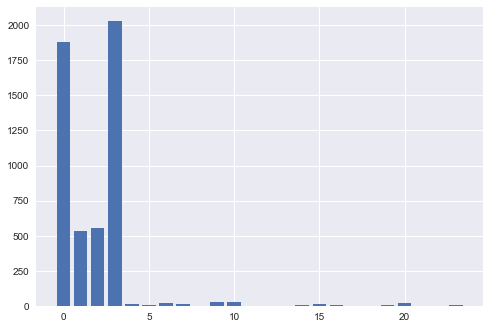

In [21]:
fs.fit(X_train, y_train)
# transform train input data
X_train_fs = fs.transform(X_train)
for i in range(len(fs.scores_)):
    print('Feature %s: %f' % (X_train.columns[i], fs.scores_[i]))
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

In [22]:
master_data_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   join_week                  101 non-null    datetime64[ns]
 1   volume_sales               101 non-null    float64       
 2   volume_sales_merch         101 non-null    float64       
 3   volume_sales_price_reduce  101 non-null    float64       
 4   volume_sales_feature       101 non-null    float64       
 5   volume_sales_display       101 non-null    float64       
 6   chicken_meal_deal          101 non-null    float64       
 7   sec_deli                   101 non-null    float64       
 8   sec_bakery                 101 non-null    float64       
 9   sec_center                 101 non-null    float64       
 10  retail_cover               101 non-null    float64       
 11  year                       101 non-null    object        
 12  month   

In [23]:
regression_data = master_data_model.drop(columns=['join_week','year','month','week','quarter','holiday'
                                                 ,'week_start','season','totalmedia','sec_deli','sec_bakery','sec_center','retail_cover'])

In [24]:
spring_regression_data=spring_model.drop(columns=['join_week','year','month','week','quarter','holiday'
                                                 ,'week_start','season','sec_deli','sec_bakery','sec_center','retail_cover',
                                                 'autumn','summer','winter','spring','RADIO','SPONSORSHIP','BILLBOARD',
                                                  'DIGITAL','INFLUENCERS/DIGITAL'])

In [25]:
X = spring_regression_data.drop('volume_sales',axis=1)
y = spring_regression_data[["volume_sales"]]
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1,test_size = 0.25)
model = LinearRegression()
model.fit(X_train, y_train)
# coefficient of variables
print('Model Coefficients:Spring')
for index, col in enumerate(X_train.columns):
    print(f"{col}: {round(model.coef_[0][index],2)}")
print('R-squared=',model.score(X_test, y_test))

Model Coefficients:Spring
volume_sales_merch: 2.01
volume_sales_price_reduce: -0.33
volume_sales_feature: -0.47
volume_sales_display: -0.4
chicken_meal_deal: -15687605.91
holiday_binary: -46118.63
PRINT: -0.07
TV: -0.2
VOD: 0.99
BASEBALL: -11.34
R-squared= 0.973414649840993


In [26]:
summer_regression_data=summer_model.drop(columns=['join_week','year','month','week','quarter','holiday'
                                                 ,'week_start','season','sec_deli','sec_bakery','sec_center','retail_cover',
                                                 'autumn','summer','winter','spring','INFLUENCERS/DIGITAL','PRINT',
                                                 'BILLBOARD'])

In [27]:
X = summer_regression_data.drop('volume_sales',axis=1)
y = summer_regression_data[["volume_sales"]]
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=520,test_size = 0.25)
model = LinearRegression()
model.fit(X_train, y_train)
# coefficient of variables
print('Model Coefficients:Summer')
for index, col in enumerate(X_train.columns):
    print(f"{col}: {round(model.coef_[0][index],2)}")
print('R-squared=',model.score(X_test, y_test))

Model Coefficients:Summer
volume_sales_merch: 2.07
volume_sales_price_reduce: -0.54
volume_sales_feature: -0.28
volume_sales_display: -0.16
chicken_meal_deal: -5152686.88
holiday_binary: -49651.16
DIGITAL: 0.26
SPONSORSHIP: 0.33
TV: 0.21
VOD: -0.61
BASEBALL: 0.07
RADIO: -0.35
R-squared= 0.990700066690389


In [28]:
autumn_regression_data=autumn_model.drop(columns=['join_week','year','month','week','quarter','holiday'
                                                 ,'week_start','season','sec_deli','sec_bakery','sec_center','retail_cover',
                                                 'autumn','summer','winter','spring','PRINT','BILLBOARD'])

In [29]:
X = autumn_regression_data.drop('volume_sales',axis=1)
y = autumn_regression_data[["volume_sales"]]
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=5222,test_size = 0.25)
model = LinearRegression()
model.fit(X_train, y_train)
# coefficient of variables
print('Model Coefficients:Autumn')
for index, col in enumerate(X_train.columns):
    print(f"{col}: {round(model.coef_[0][index],2)}")
print('R-squared=',model.score(X_test, y_test))

Model Coefficients:Autumn
volume_sales_merch: 0.35
volume_sales_price_reduce: -0.07
volume_sales_feature: 0.0
volume_sales_display: 1.11
chicken_meal_deal: -38782854.46
holiday_binary: -24681.32
DIGITAL: 1.43
INFLUENCERS/DIGITAL: 0.59
SPONSORSHIP: 0.24
TV: 0.07
VOD: -0.77
BASEBALL: 0.56
RADIO: -0.96
R-squared= 0.9915754069194969


In [30]:
winter_regression_data=winter_model.drop(columns=['join_week','year','month','week','quarter','holiday'
                                                 ,'week_start','season','sec_deli','sec_bakery','sec_center','retail_cover',
                                                 'autumn','summer','winter','spring','PRINT','SPONSORSHIP','BASEBALL','RADIO'])

In [31]:
X = winter_regression_data.drop('volume_sales',axis=1)
y = winter_regression_data[["volume_sales"]]
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=5252,test_size = 0.25)
model = LinearRegression()
model.fit(X_train, y_train)
# coefficient of variables
print('Model Coefficients:Winter')
for index, col in enumerate(X_train.columns):
    print(f"{col}: {round(model.coef_[0][index],2)}")
print('R-squared=',model.score(X_test, y_test))

Model Coefficients:Winter
volume_sales_merch: 2.13
volume_sales_price_reduce: -1.01
volume_sales_feature: -0.09
volume_sales_display: 0.02
chicken_meal_deal: -33726838.32
holiday_binary: -73298.73
BILLBOARD: 0.02
DIGITAL: 9.04
INFLUENCERS/DIGITAL: -37.6
TV: -0.59
VOD: 2.52
R-squared= 0.9846819179498114


In [32]:
X = regression_data.drop('volume_sales',axis=1)
y = regression_data[["volume_sales"]]
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=599999,test_size = 0.25)
model = LinearRegression()
model.fit(X_train, y_train)
# coefficient of variables
for index, col in enumerate(X_train.columns):
    print(f"{col}: {round(model.coef_[0][index],2)}")
print('R-squared=',model.score(X_test, y_test))

volume_sales_merch: 0.09
volume_sales_price_reduce: 0.02
volume_sales_feature: -0.3
volume_sales_display: 1.58
chicken_meal_deal: -11045207.23
holiday_binary: 13684.88
BILLBOARD: 0.39
DIGITAL: 0.48
INFLUENCERS/DIGITAL: 1.06
PRINT: 0.39
SPONSORSHIP: 0.27
TV: -0.06
VOD: 0.06
autumn: -15164.47
spring: 27218.39
summer: -61041.62
winter: 48987.7
BASEBALL: -0.46
RADIO: -0.23
R-squared= 0.9717653629513995


In [33]:
y_predict = model.predict(X_test)
MSE = mean_squared_error(y_test, y_predict)
MSE

50268409472.19027

In [34]:
model = sm.OLS(y_train, sm.add_constant(X_train))
model_fit = model.fit()
dataframe = pd.concat([X_train, y_train], axis=1)
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           volume_sales   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     1033.
Date:                Wed, 18 Nov 2020   Prob (F-statistic):           6.92e-64
Time:                        13:24:14   Log-Likelihood:                -912.39
No. Observations:                  75   AIC:                             1863.
Df Residuals:                      56   BIC:                             1907.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                      1.095e+06   3.11e+05      3.518      0.001    4.72e+05    1.72e+06
volume_sales_merch            0.0934      0.198      0.472      0.639      -0.303       0.490
volume_sales_price_reduce     0.0173      0.104      0.166      0.869      -0.191       0.226
volume_sales_feature         -0.3045      0.065     -4.653      0.000      -0.436      -0.173
volume_sales_display          1.5766      0.185      8.520      0.000       1.206       1.947
chicken_meal_deal         -1.105e+07   4.34e+06     -2.547      0.014   -1.97e+07   -2.36e+06
holiday_binary             1.368e+04   1.74e+04      0.787      0.434   -2.11e+04    4.85e+04
BILLBOARD                     0.3883      0.205      1.896      0.063      -0.022       0.799
DIGITAL                       0.4831      0.242      1.996      0.051      -0.002       0.968
INFLUENCERS/DIGITAL           1.0613      1.213      0.875      0.385      -1.368       3.491
PRINT                         0.3939      0.322      1.223      0.226      -0.251       1.039
SPONSORSHIP                   0.2686      0.089      3.009      0.004       0.090       0.447
TV                           -0.0587      0.061     -0.969      0.337      -0.180       0.063
VOD                           0.0554      0.317      0.175      0.862      -0.580       0.691
autumn                     2.586e+05   7.23e+04      3.575      0.001    1.14e+05    4.04e+05
spring                      3.01e+05   8.62e+04      3.491      0.001    1.28e+05    4.74e+05
summer                     2.127e+05   7.24e+04      2.938      0.005    6.77e+04    3.58e+05
winter                     3.228e+05   8.74e+04      3.694      0.001    1.48e+05    4.98e+05
BASEBALL                     -0.4638      0.340     -1.365      0.178      -1.145       0.217
RADIO                        -0.2323      0.346     -0.671      0.505      -0.926       0.461
==============================================================================
Omnibus:                        1.300   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.522   Jarque-Bera (JB):                1.300
Skew:                           0.221   Prob(JB):                        0.522
Kurtosis:                       2.530   Cond. No.                     2.85e+22
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.42e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

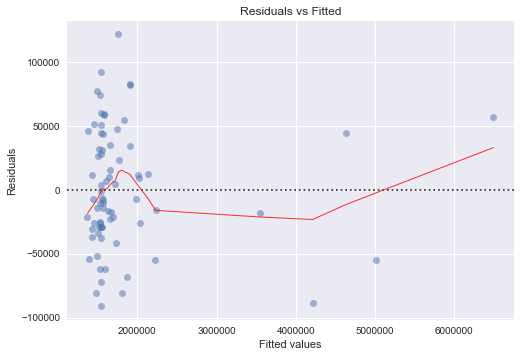

In [36]:
model_fitted_y = model_fit.fittedvalues
# model residuals
model_residuals = model_fit.resid
model_norm_residuals = model_fit.get_influence().resid_studentized_internal
# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
# absolute residuals
model_abs_resid = np.abs(model_residuals)
# leverage, from statsmodels internals
model_leverage = model_fit.get_influence().hat_matrix_diag
# cook's distance, from statsmodels internals
model_cooks = model_fit.get_influence().cooks_distance[0]

plot_lm_1 = plt.figure()
plot_lm_1.axes[0] = sns.residplot(model_fitted_y, dataframe.columns[-1], data=dataframe,
                          lowess=True,
                          scatter_kws={'alpha': 0.5},
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals');
plt.savefig('pic1.png')

- We can see that most residual points center around smaller fitted values, where the red line is horizontal.
- Over large fitted values, the red line slides down and up again, which indicates no significant trend. We have also too few large fitted values to validate the effect of non-linear factors.

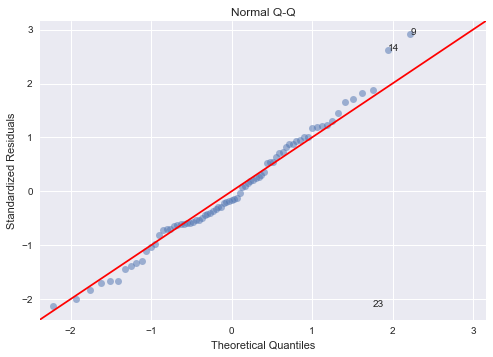

In [37]:
from statsmodels.graphics.gofplots import ProbPlot
plt.style.use('seaborn') 
QQ = ProbPlot(model_norm_residuals)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)
plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals');
# annotations
abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
abs_norm_resid_top_3 = abs_norm_resid[:3]
for r, i in enumerate(abs_norm_resid_top_3):
    plot_lm_2.axes[0].annotate(i,
                               xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
                                   model_norm_residuals[i]));

- An ideal qq plot should be fitted with the red line.
- The residual seems not to be normally distributed. 

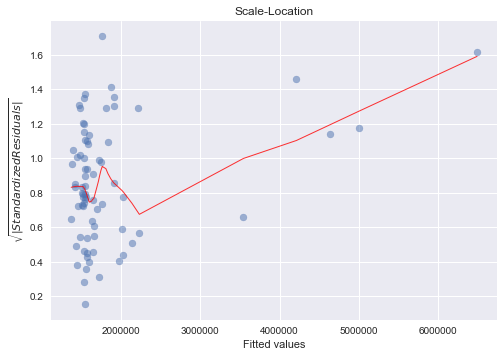

In [38]:
plot_lm_3 = plt.figure()
plt.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5);
sns.regplot(model_fitted_y, model_norm_residuals_abs_sqrt,
              scatter=False,
              ci=False,
              lowess=True,
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
plot_lm_3.axes[0].set_title('Scale-Location')
plot_lm_3.axes[0].set_xlabel('Fitted values')
plot_lm_3.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$');

  # annotations
abs_sq_norm_resid = np.flip(np.argsort(model_norm_residuals_abs_sqrt), 0)
abs_sq_norm_resid_top_3 = abs_sq_norm_resid[:3]


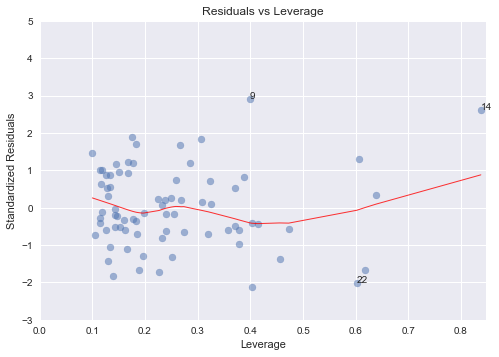

In [39]:
plot_lm_4 = plt.figure();
plt.scatter(model_leverage, model_norm_residuals, alpha=0.5);
sns.regplot(model_leverage, model_norm_residuals,
              scatter=False,
              ci=False,
              lowess=True,
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
plot_lm_4.axes[0].set_xlim(0, max(model_leverage)+0.01)
plot_lm_4.axes[0].set_ylim(-3, 5)
plot_lm_4.axes[0].set_title('Residuals vs Leverage')
plot_lm_4.axes[0].set_xlabel('Leverage')
plot_lm_4.axes[0].set_ylabel('Standardized Residuals');

  # annotations
leverage_top_3 = np.flip(np.argsort(model_cooks), 0)[:3]
for i in leverage_top_3:
      plot_lm_4.axes[0].annotate(i,
                                 xy=(model_leverage[i],
                                     model_norm_residuals[i]));

In [40]:
X = regression_data.drop('volume_sales',axis=1)
y = np.log(regression_data[["volume_sales"]])
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state= 1, test_size = 0.25)
model = LinearRegression()
model.fit(X_train, y_train)
# coefficient of variables
for index, col in enumerate(X_train.columns):
    print(f"{col}: {round(model.coef_[0][index],2)}")
print('R-squared=',model.score(X_test, y_test))

volume_sales_merch: 0.0
volume_sales_price_reduce: -0.0
volume_sales_feature: -0.0
volume_sales_display: -0.0
chicken_meal_deal: -1.88
holiday_binary: 0.04
BILLBOARD: 0.0
DIGITAL: 0.0
INFLUENCERS/DIGITAL: 0.0
PRINT: 0.0
SPONSORSHIP: 0.0
TV: -0.0
VOD: 0.0
autumn: 0.01
spring: -0.0
summer: 0.01
winter: -0.01
BASEBALL: -0.0
RADIO: 0.0
R-squared= 0.8943120789924462


In [41]:
# fit regression model
X = regression_data.drop('volume_sales',axis=1)
y = regression_data[["volume_sales"]]
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=99,test_size = 0.25)
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)
model = LinearRegression()
model.fit(X_train_scaled, y_train)
# coefficient of variables
for index, col in enumerate(X_train.columns):
    print(f"{col}: {round(model.coef_[0][index],2)}")
print('R-squared=',model.score(X_test_scaled, y_test))

volume_sales_merch: 1046232.07
volume_sales_price_reduce: -359709.45
volume_sales_feature: -39023.68
volume_sales_display: 382627.23
chicken_meal_deal: -23709.66
holiday_binary: 10479.19
BILLBOARD: 37765.35
DIGITAL: 22580.36
INFLUENCERS/DIGITAL: -16354.55
PRINT: 12667.46
SPONSORSHIP: 15914.84
TV: -59969.98
VOD: 44331.17
autumn: 3902.7
spring: 1693.83
summer: -18586.69
winter: 14215.2
BASEBALL: -19917.44
RADIO: 9448.8
R-squared= 0.9905464062899685
